In [63]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [64]:
def get_pvalue(x):
    return round(shapiro(x).pvalue, 5)

In [65]:
page_id = '8'
password_response, time_response, survey_response, dids = get_responses()
questions = get_questions()

Total: 120; 
Attentive: 104; Non Attentive: 16


In [66]:
survey_response_df = pd.DataFrame(survey_response)

csquest = pd.json_normalize(survey_response_df[page_id])
csquest.drop(attention.get(page_id).keys(), axis=1, inplace=True)

qualindex = ['9-1', '11-1']
csquestqual = csquest[qualindex]
# csquestqual.to_csv('data/qualitative/csquest_qual.csv', index=False)
csquestqual

csquestquant = csquest.drop(qualindex, axis=1).fillna(4).astype(float)

# normalize scale 1 to 8 to scale -3 to 3
normcsquestquant = csquestquant - 4
csquestquant.update(normcsquestquant)

new_columns = {}
for qsid in csquestquant.columns:
    new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
csquestquant.rename(columns=new_columns, inplace=True)

In [67]:
csquestqual.head(2)
csquestqual['did'] = dids
csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
csquestqual.drop('did', axis=1, inplace=True)
csquestqual
csquestqual.to_csv('data/qualitative/csquest_qual.csv', index=False)

<ipython-input-67-cdd3672722de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csquestqual['did'] = dids
<ipython-input-67-cdd3672722de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
/Users/rizu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [68]:
csquestquant['did'] = dids
csquestquant['design'] = csquestquant['did'].apply(lambda x: get_design(x))
csquestquant.drop('did', axis=1, inplace=True)
did_csquestquant = csquestquant.groupby('design').mean()
display(csquestquant.head())
display(csquestquant.describe())
csquestquant.to_csv('data/csvs/csquestquant.csv', index=False)


,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,Engaging,Attractive,Informative,Creative,To the Point,Easy to understand,Real life motivation,Ease to follow pages,Reflection,design
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,infographics
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,0.0,conversation
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,reflection
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,reflection
4,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,0.0,-2.0,...,0.0,-1.0,0.0,2.0,1.0,1.0,-1.0,1.0,0.0,conversation


,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,Well Organized,Engaging,Attractive,Informative,Creative,To the Point,Easy to understand,Real life motivation,Ease to follow pages,Reflection
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1.596154,1.403846,1.846154,1.836538,1.807692,1.951923,1.961538,1.451923,0.990385,1.201923,1.798077,1.471154,1.298077,1.807692,1.528846,1.721154,2.038462,1.615385,1.048077,0.394231
std,1.288630,1.273473,1.327595,1.175069,1.292825,1.193671,1.268920,1.342941,1.280892,1.396110,1.185510,1.306866,1.480487,1.183027,1.336251,1.396645,1.198082,1.331527,1.201777,0.959554
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.500000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.250000,2.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


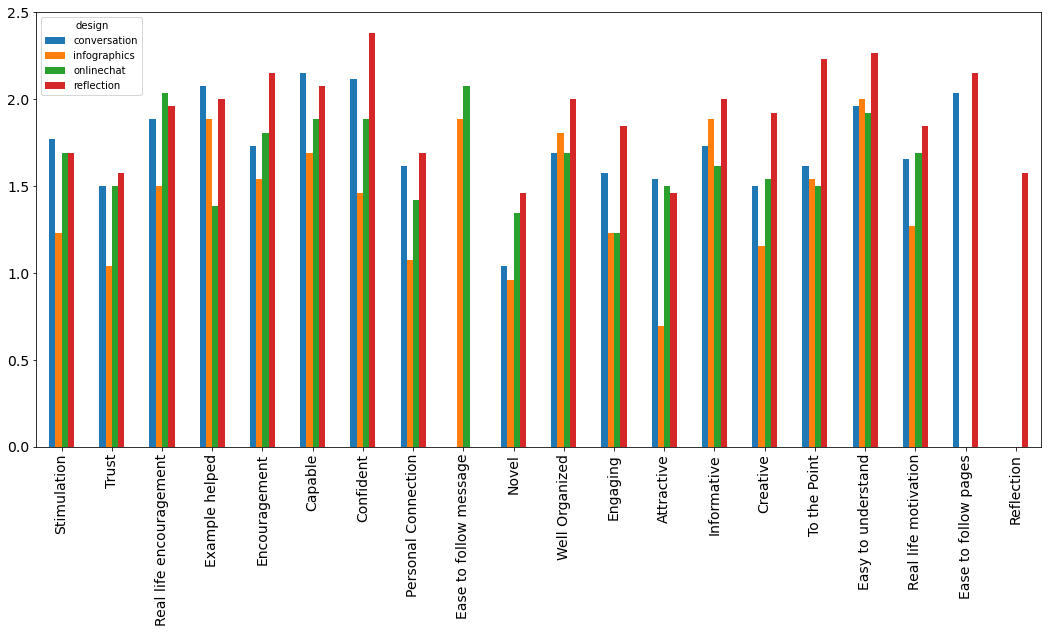

In [69]:
chart = did_csquestquant.T.plot.bar(figsize=(18, 8), fontsize=14, style=".-")

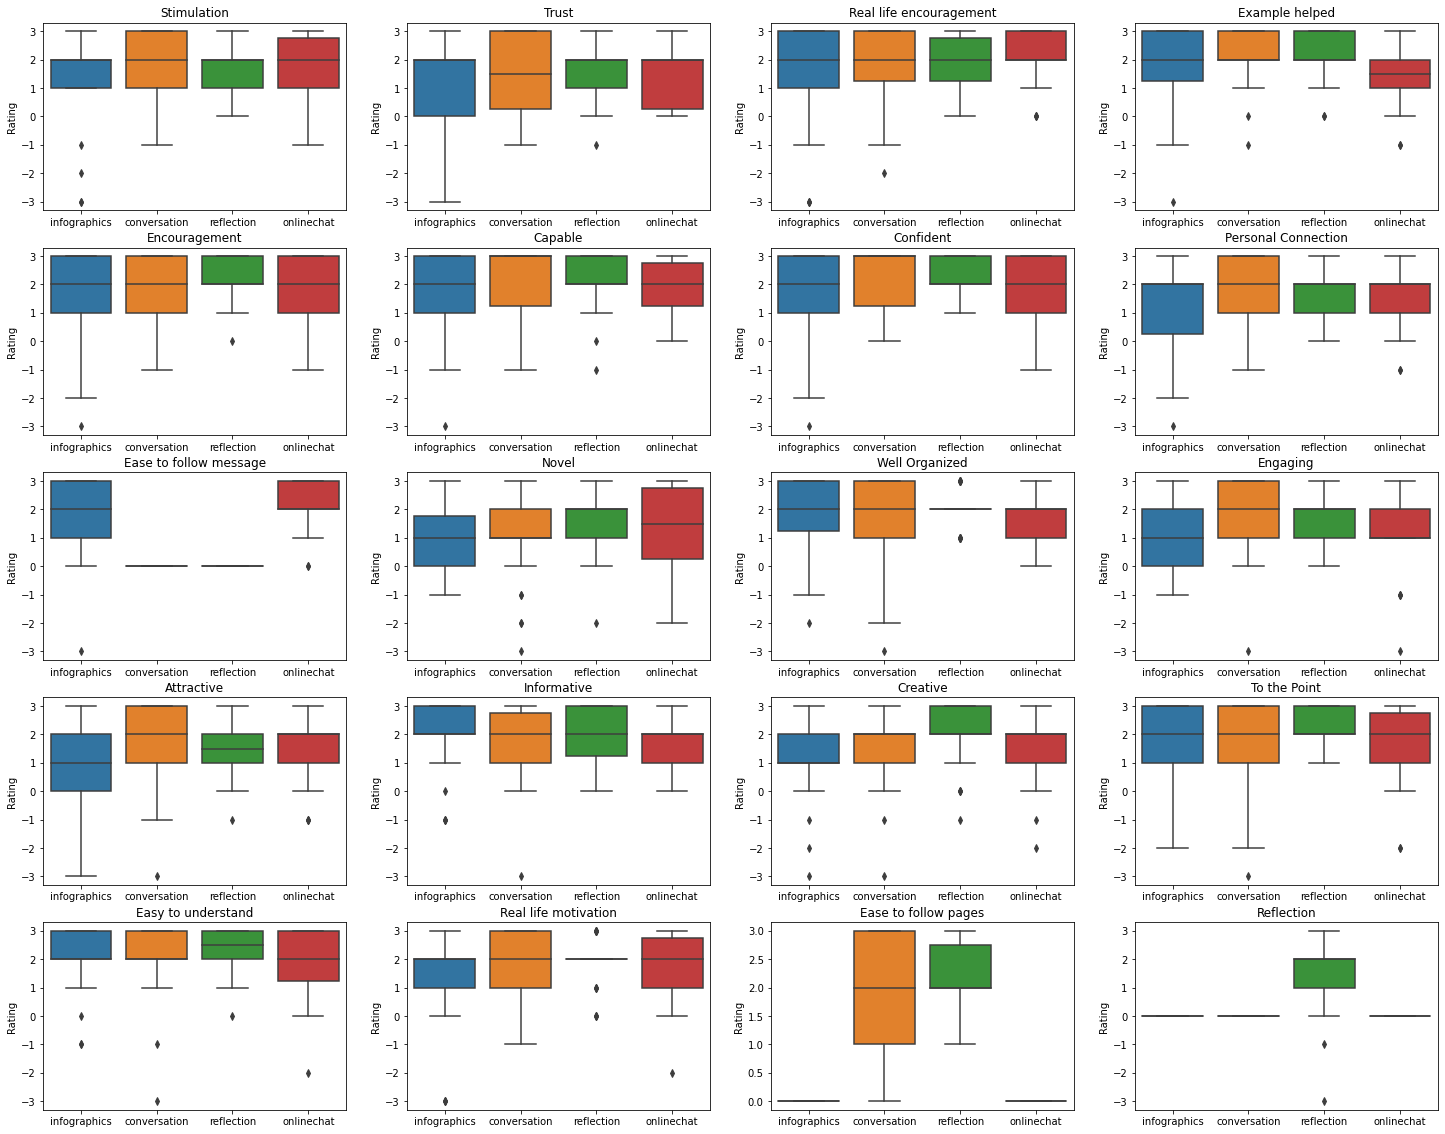

In [70]:
# display(csquestquant)
nrows, ncols = 5, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 20))
k = 0
for i in range(nrows):
    for j in range(ncols):
        if k < len(csquestquant.columns):
            # print(csquestquant.columns[k])
            sns.boxplot(data=csquestquant, x='design', y=csquestquant.columns[k], ax=axes[i][j])
            # sns.swarmplot(data=csquestquant, x='design', y=csquestquant.columns[i+j], ax=axes[i][j])
            axes[i][j].set_ylabel('Rating')
            axes[i][j].set_xlabel('')
            axes[i][j].set_title(csquestquant.columns[k])
            k += 1

In [71]:
# for design in did_map.values():
#     fig, axes = plt.subplots(4, 4, figsize=(25, 20))
#     k = 0
#     for i in range(4):
#         for j in range(4):
#             fdata = csquestquant[csquestquant['design']==design]
#             sns.histplot(data=fdata, x=csquestquant.columns[k], kde=True, ax=axes[i][j])
#             axes[i][j].set_ylabel('Rating')
#             axes[i][j].set_xlabel('')
#             axes[i][j].set_title(csquestquant.columns[k] )
#             axes[i][j].set_title(f'{csquestquant.columns[k]} -- p-value: {get_pvalue(fdata[csquestquant.columns[k]])}')
#             k += 1
#     fig.suptitle(f'{design}')

In [72]:
test = {}
designs = []
quests = csquestquant.columns.to_list()
quests.remove('design')
for i, param in enumerate(quests):
    test[param] = []
    for design in did_map.values():
        test[param].append(csquestquant[csquestquant['design']==design][param].to_list())
        designs.append(design) if i<=0 else None

# Performing kruskal test
for k, v in test.items():
    print(f'{k}: {kruskal(*v)}')

Stimulation: KruskalResult(statistic=1.4917385572531041, pvalue=0.6841783755251889)
Trust: KruskalResult(statistic=1.0477643321438792, pvalue=0.7896965327872166)
Real life encouragement: KruskalResult(statistic=0.6490295695593452, pvalue=0.8851220246590592)
Example helped: KruskalResult(statistic=7.44507353247318, pvalue=0.058986670867872286)
Encouragement: KruskalResult(statistic=1.5525204328466617, pvalue=0.6702027491816334)
Capable: KruskalResult(statistic=3.3890169494941267, pvalue=0.3354440629843259)
Confident: KruskalResult(statistic=4.159873875815915, pvalue=0.24471010190815018)
Personal Connection: KruskalResult(statistic=1.4213407919384557, pvalue=0.7005400440250553)
Ease to follow message: KruskalResult(statistic=72.97972125132108, pvalue=9.81813930774536e-16)
Novel: KruskalResult(statistic=2.8295304979164646, pvalue=0.4186617143266056)
Well Organized: KruskalResult(statistic=2.3796657857806567, pvalue=0.4974310543678969)
Engaging: KruskalResult(statistic=3.9256215096378635, 

KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=1.2806521970422362, pvalue=0.25777780551145335)
KruskalResult(statistic=0.8282438764566635, pvalue=0.3627808224331345)
KruskalResult(statistic=0.41960191345466225, pvalue=0.5171357485574553)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=0.7001643077754842, pvalue=0.4027284899637674)
KruskalResult(statistic=0.6043523009248726, pvalue=0.43692222792168145)
KruskalResult(statistic=0.7114826157449182, pvalue=0.39895205837434533)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=0.35536590848117383, pvalue=0.5510912239214907)
KruskalResult(statistic=0.32711101775486173, pvalue=0.5673651977915666)
KruskalResult(statistic=0.002331057733406409, pvalue=0.9614922738147306)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=0.0008550734357112558, pvalue=0.9766718725145106)
KruskalResult(statistic=4.155078149785313, pvalue=0.04150985831545315)
KruskalResult(statistic=0.21634201126780428,

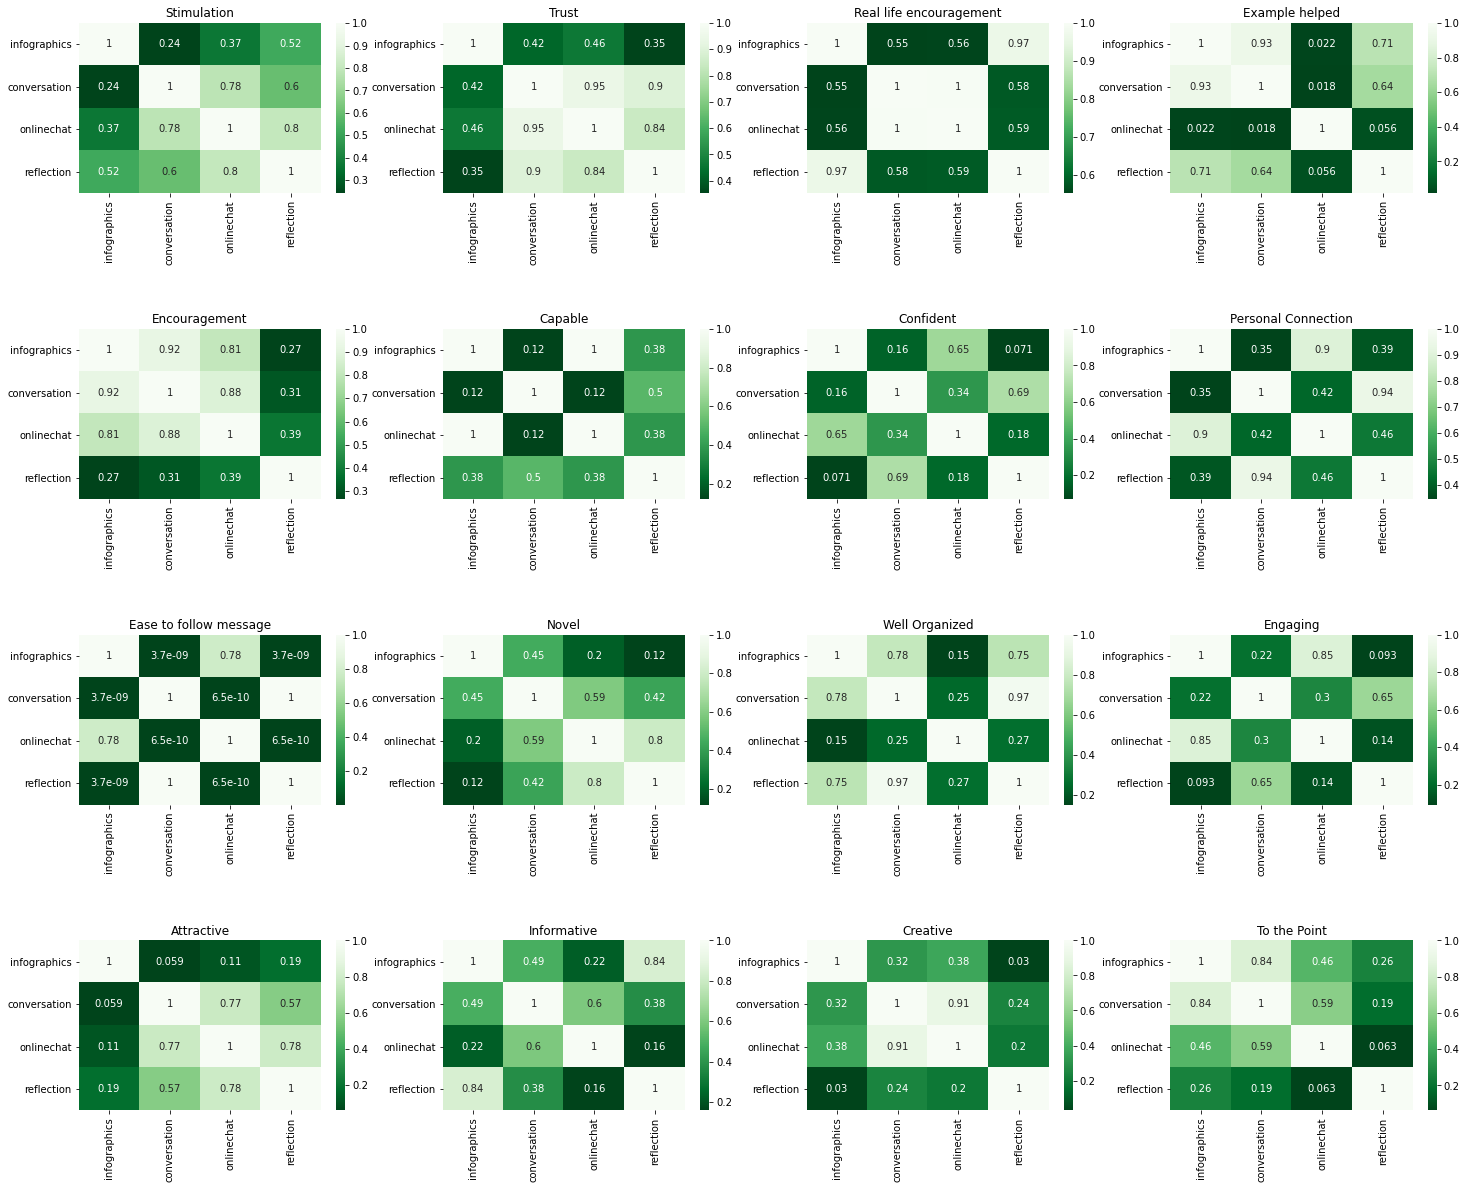

In [73]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
fig.subplots_adjust(hspace=0.8)

k=0
for i in range(4):
    for j in range(4):
        data = sp.posthoc_dunn(test[quests[k]])
        data.index = data.index.map(get_design)
        data.columns = data.columns.map(get_design)
        kaka = test[quests[k]]
        # print((test[quests[k]]))
        for m in range(0, len(kaka)):
            try:
                print(kruskal(kaka[0], kaka[m]))
                # print(kruskal(kaka[0], kaka[m])) if i == j == 0 else None

            except:
                pass
        sns.heatmap(data, annot=True, ax=axes[i][j], cmap="Greens_r")
        axes[i][j].set_title(quests[k])
        k += 1

In [74]:
csquestquant

,Stimulation,Trust,Real life encouragement,Example helped,Encouragement,Capable,Confident,Personal Connection,Ease to follow message,Novel,...,Engaging,Attractive,Informative,Creative,To the Point,Easy to understand,Real life motivation,Ease to follow pages,Reflection,design
0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,infographics
1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,0.0,conversation
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,reflection
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,reflection
4,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,0.0,-2.0,...,0.0,-1.0,0.0,2.0,1.0,1.0,-1.0,1.0,0.0,conversation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,1.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,3.0,...,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,reflection
100,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,-1.0,-2.0,0.0,0.0,-1.0,-1.0,2.0,0.0,0.0,infographics
101,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,0.0,1.0,...,2.0,2.0,0.0,1.0,2.0,3.0,2.0,3.0,2.0,reflection
102,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,0.0,1.0,...,2.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,0.0,conversation


<AxesSubplot:>

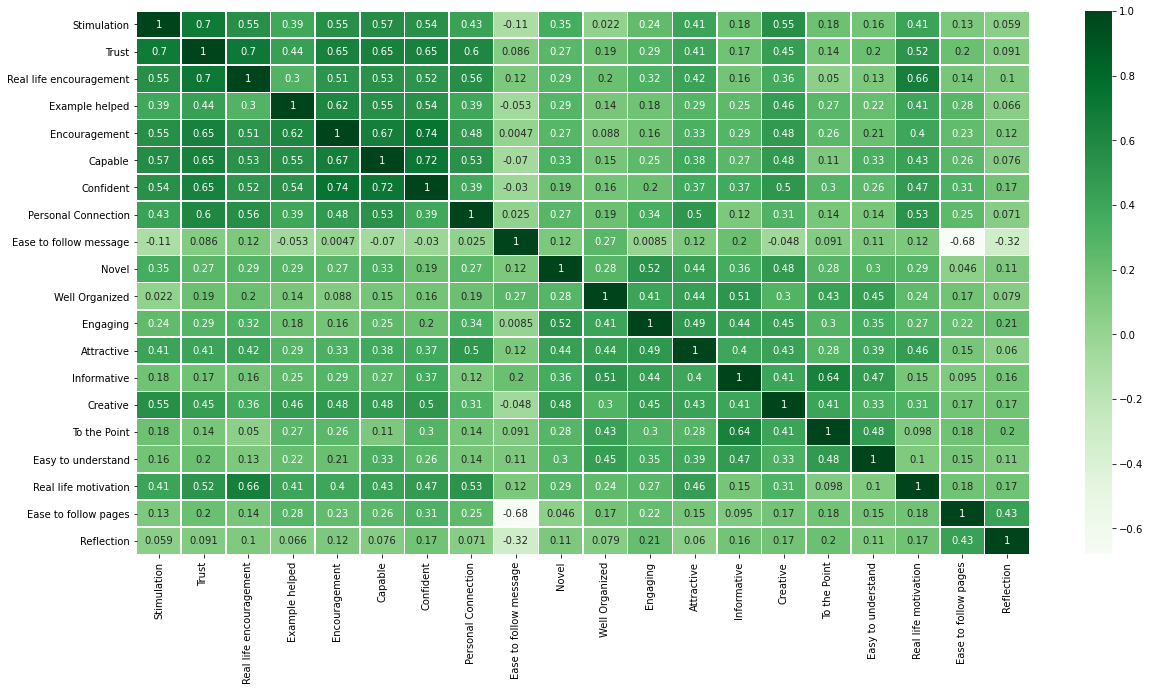

In [75]:
cormat = csquestquant.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)

In [76]:
# for design in did_map.values():
#     cormat = csquestquant[csquestquant['design']==design].corr(method='pearson')
#     fig, ax = plt.subplots(figsize=(20, 10))
#     sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)
#     fig.suptitle(design)

### For which type of website would you like to see this design

In [77]:
new_columns = {}
print(csquestqual.columns)
for qsid in csquestqual.columns:
    if (qsid != 'design'):
        new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')

csquestqual.rename(columns=new_columns, inplace=True)
# csquestqual['did'] = dids
# csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
# csquestqual.drop('did', axis=1, inplace=True)
csquestqual

Index(['9-1', '11-1', 'design'], dtype='object')


/Users/rizu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Account creation page,Design evaluation,design
0,"[Social Media, Email, Financial Websites]","I like the idea. I like the example phrase ""I ...",infographics
1,"[Social Media, Email, Financial Websites, Gami...",This is entertaining and relatable! It is an i...,conversation
2,"[Social Media, Gaming Websites]",I think the design looks nice and it was well ...,reflection
3,[Social Media],I think the strategy if easy to follow but I t...,reflection
4,[None of the above],I thought about if I would personally use this...,conversation
...,...,...,...
99,"[Social Media, Email, E-commerce Websites, Gov...",Clarity and coherence of the content.,reflection
100,[Social Media],Seems simple and affective. I wish the numbers...,infographics
101,"[Social Media, Email, Financial Websites, E-co...",I'm pretty certain that it will help me create...,reflection
102,"[Social Media, Email, Government Websites]",It is very useful in guiding about the passwor...,conversation


In [78]:
account_creation = csquestqual.copy()
account_creation.drop(['Design evaluation'], axis=1, inplace=True)
account_creation

,Account creation page,design
0,"[Social Media, Email, Financial Websites]",infographics
1,"[Social Media, Email, Financial Websites, Gami...",conversation
2,"[Social Media, Gaming Websites]",reflection
3,[Social Media],reflection
4,[None of the above],conversation
...,...,...
99,"[Social Media, Email, E-commerce Websites, Gov...",reflection
100,[Social Media],infographics
101,"[Social Media, Email, Financial Websites, E-co...",reflection
102,"[Social Media, Email, Government Websites]",conversation


#### Top 3 websites type

In [79]:
design_ac = account_creation.explode('Account creation page').groupby(['design']).apply(lambda grp: grp.groupby('Account creation page')['design'].count().to_dict()).to_dict()
design_ac_df = pd.DataFrame(design_ac).T
print(design_ac_df.sum().sort_values())
design_ac_df

n/a                                                                      1.0
think all would be nice                                                  1.0
Testing sites                                                            1.0
None of the above                                                        4.0
Content Websites, e.g. Audio/Video Streaming, Online Newspaper, etc.    23.0
Gaming Websites                                                         28.0
Government Websites                                                     33.0
Course Management Websites, e.g. Canvas, Blackboard, etc.               36.0
E-commerce Websites                                                     44.0
Email                                                                   53.0
Financial Websites                                                      55.0
Social Media                                                            80.0
dtype: float64


,"Content Websites, e.g. Audio/Video Streaming, Online Newspaper, etc.","Course Management Websites, e.g. Canvas, Blackboard, etc.",E-commerce Websites,Email,Financial Websites,Gaming Websites,Government Websites,None of the above,Social Media,n/a,think all would be nice,Testing sites
conversation,7.0,9.0,7.0,10.0,12.0,6.0,11.0,1.0,23.0,1.0,NaN,NaN
infographics,5.0,11.0,12.0,15.0,15.0,9.0,4.0,2.0,15.0,NaN,1.0,NaN
onlinechat,5.0,5.0,14.0,15.0,15.0,10.0,10.0,NaN,19.0,NaN,NaN,NaN
reflection,6.0,11.0,11.0,13.0,13.0,3.0,8.0,1.0,23.0,NaN,NaN,1.0


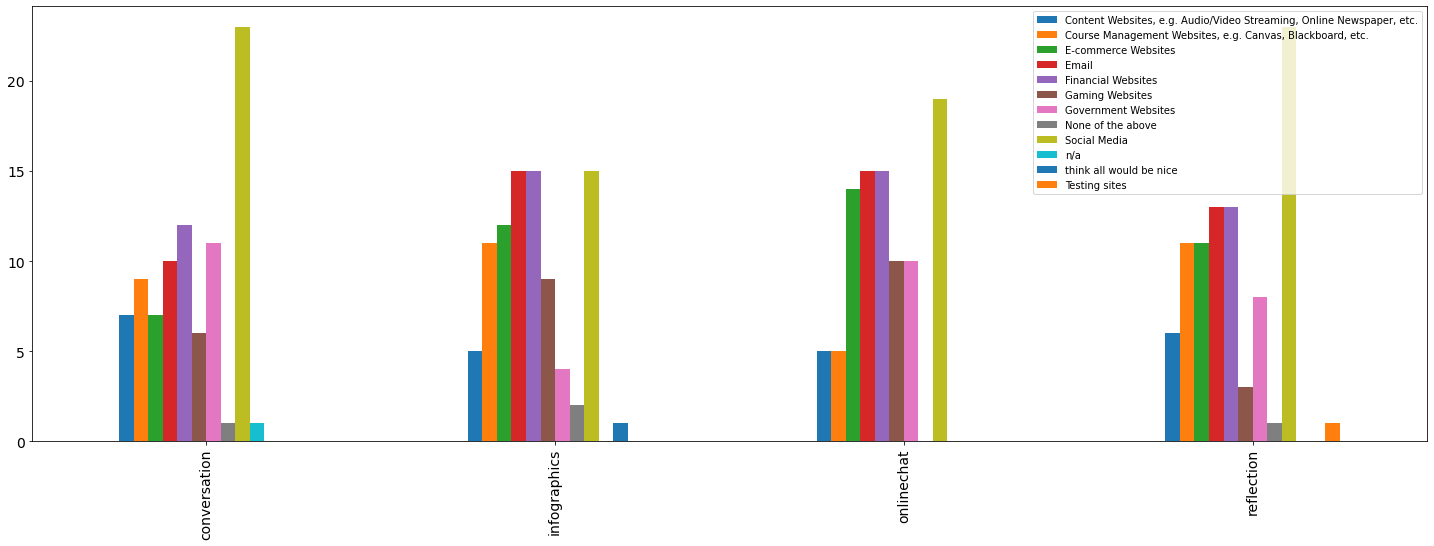

In [80]:
_ = design_ac_df.plot.bar(figsize=(25, 8), fontsize=14, style=".-")

In [81]:
temp = design_ac_df.copy()
one = ["Social Media", "Email", "Financial Websites"]
temp.drop('None of the above', axis=1, inplace=True)
one_design = temp[one].sum(axis=1)
zero_design = temp.drop(one, axis=1).sum(axis=1)
display(one_design, zero_design)

conversation    45.0
infographics    45.0
onlinechat      49.0
reflection      49.0
dtype: float64

conversation    41.0
infographics    42.0
onlinechat      44.0
reflection      40.0
dtype: float64

In [82]:
one_design.sum(), zero_design.sum()

(188.0, 167.0)

In [83]:
data=design_ac_df.sum()
# sns.barplot(data.values, data.index)

### Above Average Grouping - Personal/Emotional Connection

In [84]:
cats = ['Personal Connection', 'Real life motivation', 'Engaging', 'Confident', 'Trust']
temp = csquestquant[cats]

for cat1 in cats:
    for cat2 in cats:
        if cat1 != cat2:
            print(f'{cat1} ({cat2})')
            above_average_cat = temp[temp[cat1] >= 0][[cat1, cat2]]
            below_average_cat= temp[temp[cat1] < 0][[cat1, cat2]]
            print(f'Above average count: {len(above_average_cat)}; Below average count: {len(below_average_cat)}')
            group = [above_average_cat[cat2], below_average_cat[cat2]]
            print(f'{kruskal(*group)}')
            print('-'*10)

Personal Connection (Real life motivation)
Above average count: 94; Below average count: 10
KruskalResult(statistic=5.036495516294836, pvalue=0.024818649467301786)
----------
Personal Connection (Engaging)
Above average count: 94; Below average count: 10
KruskalResult(statistic=8.29256066570333, pvalue=0.003980781625592775)
----------
Personal Connection (Confident)
Above average count: 94; Below average count: 10
KruskalResult(statistic=2.5351442254111447, pvalue=0.11133671297718971)
----------
Personal Connection (Trust)
Above average count: 94; Below average count: 10
KruskalResult(statistic=10.164411763459954, pvalue=0.0014317759014362713)
----------
Real life motivation (Personal Connection)
Above average count: 97; Below average count: 7
KruskalResult(statistic=9.254221895226678, pvalue=0.0023495314111203016)
----------
Real life motivation (Engaging)
Above average count: 97; Below average count: 7
KruskalResult(statistic=6.238258494203813, pvalue=0.012501935084443349)
----------